In [15]:
import glob
import os
import sys

%matplotlib widget

import timeloopfe.v4 as tl
from joblib import Parallel, delayed

# add workspace root directory to Python path for local imports
workspace_root = '/home/workspace'
if workspace_root not in sys.path:
    sys.path.append(workspace_root)

from scripts.plots import *
from scripts.utils import *

In [2]:
ARCHITECTURE_CHOICE = 'simple'
SUB_ARCHITECTURES = ['AQFP_AdvNode', 'CMOS_7nm', 'AQFP_SFQ5ee']

WORKLOAD_CHOICE = 'matmul_basic'
LAYER_CHOICE = 'matmul_basic.yaml'
BATCH_SIZE = 8

if not SUB_ARCHITECTURES:
    SUB_ARCHITECTURES = [os.path.basename(f).rsplit('.', 1)[0] for f in glob.glob(f'../models/architectures/{ARCHITECTURE_CHOICE}/*.yaml')]

print(f'Architecture: {ARCHITECTURE_CHOICE} {", ".join(SUB_ARCHITECTURES)}')
print(f'Workload: {WORKLOAD_CHOICE} {LAYER_CHOICE}')

Architecture: simple AQFP_AdvNode, CMOS_7nm, AQFP_SFQ5ee
Workload: matmul_basic matmul_basic.yaml


In [26]:
kwargs = dict(
    architecture=ARCHITECTURE_CHOICE,
    workload=WORKLOAD_CHOICE,
    layer=LAYER_CHOICE,
    n_macs=1,
    reg_depth=128,
    reg_width=16
)

results_wo_cooling = {}
results_wo_cooling = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, add_cooling=False, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results_wo_cooling = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results_wo_cooling)}
energy_per_compute_wo_cooling = {k:v.per_compute('per_component_energy') for k,v in results_wo_cooling.items()}
area_wo_cooling = {k:v.per_component_area for k,v in results_wo_cooling.items()}

results_w_cooling = {}
results_w_cooling = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results_w_cooling = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results_w_cooling)}
energy_per_compute_w_cooling = {k:v.per_compute('per_component_energy') for k,v in results_w_cooling.items()}
area_w_cooling = {k:v.per_component_area for k,v in results_w_cooling.items()}


(1e-19, 5e-10)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


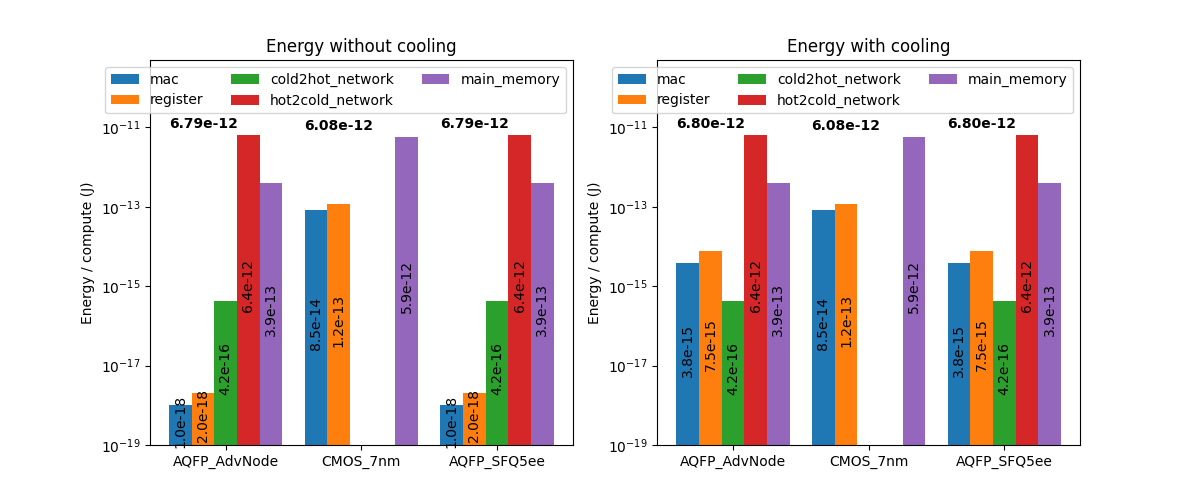

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
bar_side_by_side(energy_per_compute_wo_cooling, ylabel="Energy / compute (J)", title="Energy without cooling", yscale="log", ax=axs[0], legend_ncol=3, missing_ok=True)
bar_side_by_side(energy_per_compute_w_cooling, ylabel="Energy / compute (J)", title="Energy with cooling", yscale="log", ax=axs[1], legend_ncol=3, missing_ok=True)

axs[1].set_ylim(bottom=1e-19, top=5e-10)
axs[0].set_ylim(bottom=1e-19, top=5e-10)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


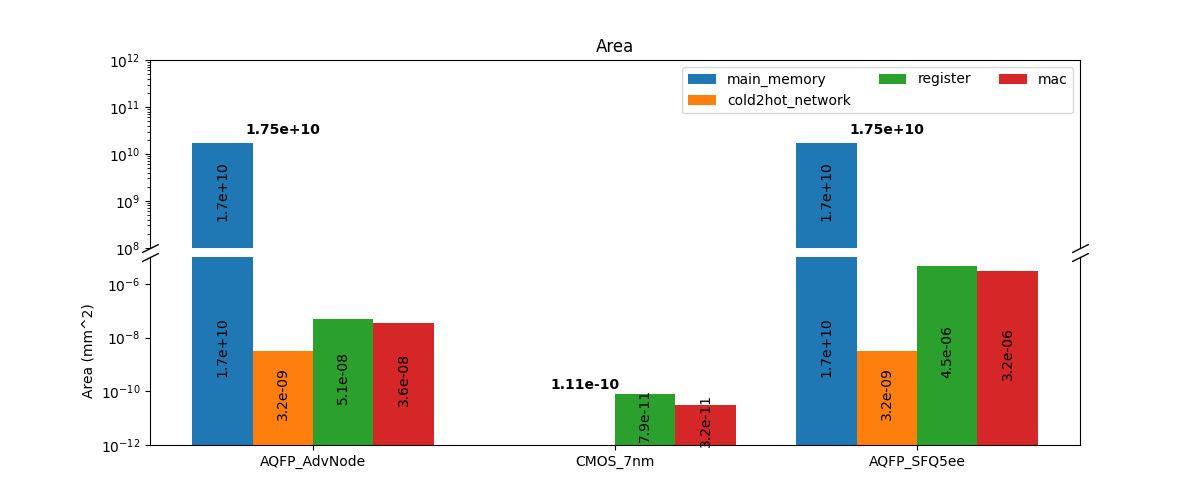

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 5))
fig.subplots_adjust(hspace=0.05)

bar_side_by_side(area_w_cooling, title="Area", yscale="log", missing_ok=True, ax=ax1, legend_ncol=3)
bar_side_by_side(area_w_cooling, ylabel="Area (mm^2)", yscale="log", missing_ok=True, ax=ax2, legend_off = True)

ax1.set_ylim(1e8, 1e12)
ax2.set_ylim(1e-12, 1e-5)

ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.tick_params(bottom=False)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

## Small register and single MAC

In [16]:
kwargs = dict(
    architecture=ARCHITECTURE_CHOICE,
    workload=WORKLOAD_CHOICE,
    layer=LAYER_CHOICE,
    n_macs=1,
    reg_depth=128,
    reg_width=16
)

results = {}
results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}
energy_per_compute = {k:v.per_compute('per_component_energy') for k,v in results.items()}
area = {k:v.per_component_area for k,v in results.items()}

posx and posy should be finite values
posx and posy should be finite values


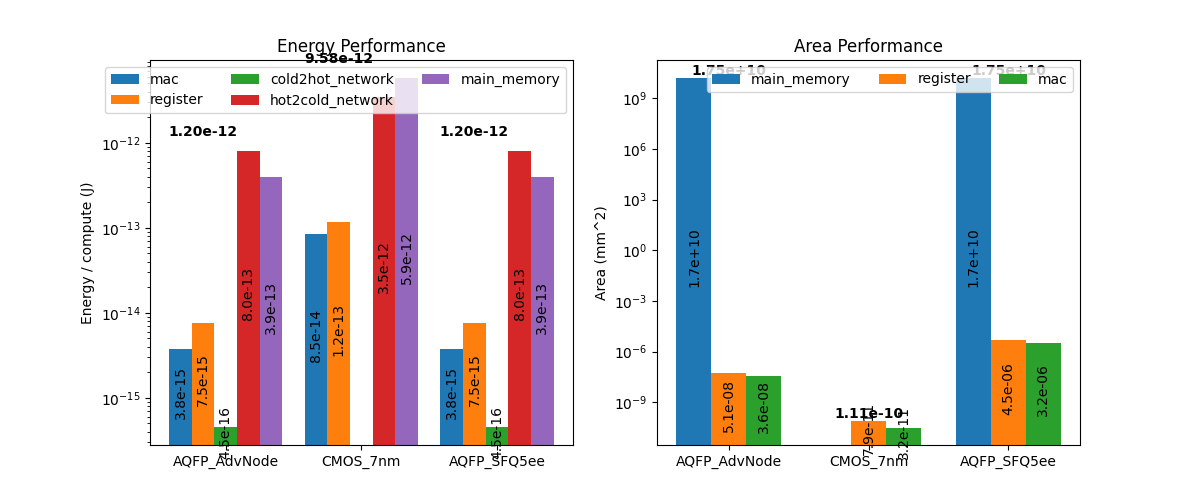

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
bar_side_by_side(energy_per_compute, ylabel="Energy / compute (J)", title="Energy Performance", yscale="log", ax=axs[0], legend_ncol=3, missing_ok=True)
bar_side_by_side(area, ylabel="Area (mm^2)", title="Area Performance", yscale="log", ax=axs[1], legend_ncol=3, missing_ok=True)

## Larger register and single MAC

In [18]:
kwargs = dict(
    architecture=ARCHITECTURE_CHOICE,
    workload=WORKLOAD_CHOICE,
    layer=LAYER_CHOICE,
    n_macs=1,
    reg_depth=128*4,
    reg_width=16
)

results = {}
results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}
energy_per_compute = {k:v.per_compute('per_component_energy') for k,v in results.items()}
area = {k:v.per_component_area for k,v in results.items()}

posx and posy should be finite values
posx and posy should be finite values


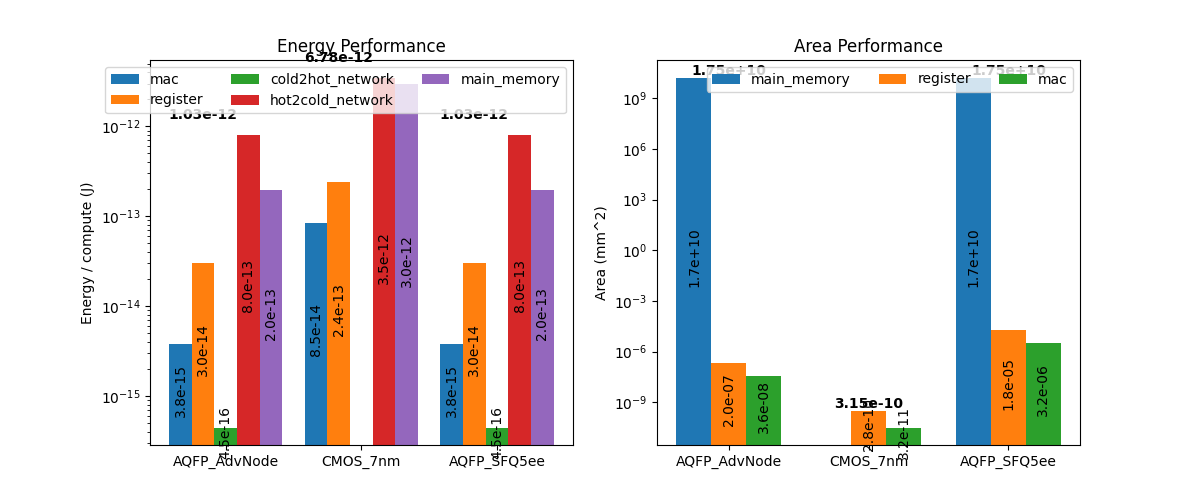

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
bar_side_by_side(energy_per_compute, ylabel="Energy / compute (J)", title="Energy Performance", yscale="log", ax=axs[0], legend_ncol=3, missing_ok=True)
bar_side_by_side(area, ylabel="Area (mm^2)", title="Area Performance", yscale="log", ax=axs[1], legend_ncol=3, missing_ok=True)

## Large register and many MACs

In [10]:
kwargs = dict(
    architecture=ARCHITECTURE_CHOICE,
    workload=WORKLOAD_CHOICE,
    layer=LAYER_CHOICE,
    n_macs=16,
    reg_depth=128*4,
    reg_width=16
)

results = {}
results = Parallel(n_jobs=-1)(delayed(generate_result)(sub_architecture, BATCH_SIZE, add_cooling=False, **kwargs) for sub_architecture in SUB_ARCHITECTURES)
results = {sub_architecture: result for sub_architecture, result in zip(SUB_ARCHITECTURES, results)}
energy_per_compute = {k:v.per_compute('per_component_energy') for k,v in results.items()}
area = {k:v.per_component_area for k,v in results.items()}

posx and posy should be finite values
posx and posy should be finite values


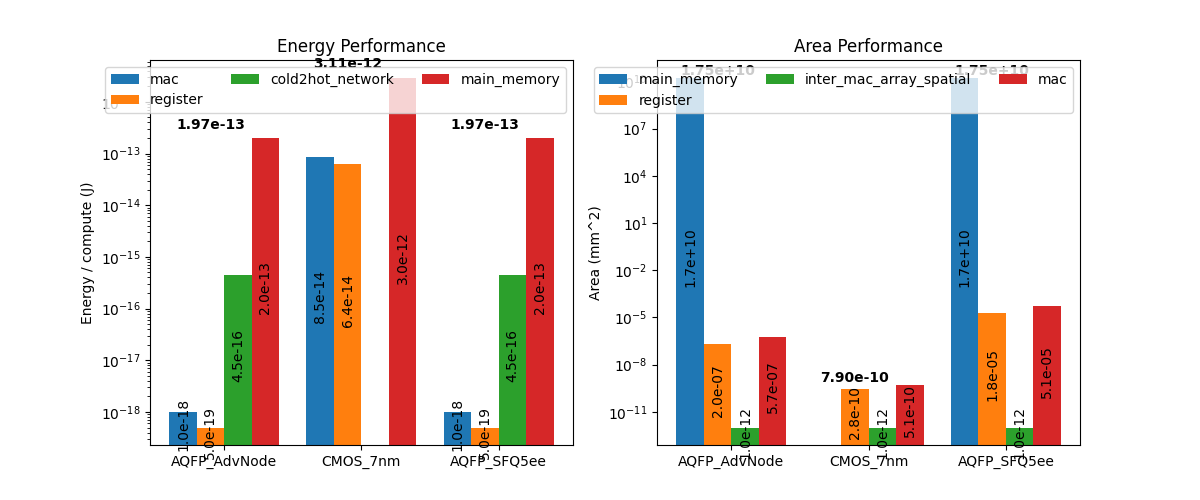

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
bar_side_by_side(energy_per_compute, ylabel="Energy / compute (J)", title="Energy Performance", yscale="log", ax=axs[0], legend_ncol=3, missing_ok=True)
bar_side_by_side(area, ylabel="Area (mm^2)", title="Area Performance", yscale="log", ax=axs[1], legend_ncol=3, missing_ok=True)